In [95]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import importlib


import Projet4_utils as utils
importlib.reload(utils)

<module 'Projet4_utils' from 'C:\\Users\\Florian\\Projet4_utils.py'>

In [96]:
PATH = "./Data"
df = pd.read_csv(os.path.join(PATH, 'building_energy_benchmark_2015-2016_engineered_v2.csv'))

In [97]:
df.columns.to_list()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'Other - Public Services',
 'Residence Hall/Dormitory',
 'Adult Education',
 'Fast Food Restaurant',
 'Data Center',
 'Other - Services',
 'Library',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Bar/Nightclub',
 'Self-Storage Facility',
 'Urgent Care/Clinic/Other Outpatient',
 'Strip Mall',
 'Non-Refrigerated Warehouse',
 'Lifestyle Center',
 'Police Station',
 'Fire Station',
 'Prison/Incarceration',
 'Senior Care Community',
 'Performing Arts',
 'Refrigerated Warehouse',
 'Pre-school/Daycare',
 'Other - Utility',
 'College/University',
 'Supermarket/Grocery Store',
 'Residential Care Facility',
 'Parking',
 'Financial Office',
 'Convention Center',
 'Restaurant',
 'Food Sales',
 'Office',
 'K-12 School',
 'Other/Specialty Hospital',
 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 78 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   NumberofBuildings                                     1696 non-null   float64
 1   NumberofFloors                                        1696 non-null   float64
 2   PropertyGFATotal                                      1696 non-null   float64
 3   PropertyGFAParking                                    1696 non-null   float64
 4   PropertyGFABuilding(s)                                1696 non-null   float64
 5   ENERGYSTARScore                                       1154 non-null   float64
 6   SiteEnergyUse(kBtu)                                   1696 non-null   float64
 7   SteamUse(kBtu)                                        1696 non-null   float64
 8   Electricity(kWh)                                      1696

# Define targets, categorical and continuous variables, split into train and test sets

In [99]:
target = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

categories=[
    'CouncilDistrictCode'
]
continuous = [i for i in df.columns.to_list() if i not in categories]
for i in target:
    continuous.remove(i)

X = df.loc[:, ~df.columns.isin(target)]

y_energy = df.loc[:, 'SiteEnergyUse(kBtu)'].values
y_GHG = df.loc[:, 'TotalGHGEmissions'].values

y = df.loc[:, ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

In [100]:
# split train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

display(X_train)

(1356, 76)
(1356, 2)
(340, 76)
(340, 2)


,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SteamUse(kBtu),Electricity(kWh),NaturalGas(kBtu),Other - Public Services,...,Bank Branch,Food Service,Other - Entertainment/Public Assembly,Other - Technology/Science,Courthouse,Other - Education,Laboratory,Fitness Center/Health Club/Gym,CouncilDistrictCode,YearBuilt
801,1.0,3.0,95501.0,0.0,95501.0,88.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3
1678,1.0,6.0,345290.0,85028.0,260262.0,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,151523.0,0.0,7,3
1223,1.0,1.0,28144.0,0.0,28144.0,24.5,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1180,1.0,6.0,48179.0,7132.0,41047.0,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
22,1.0,6.0,88592.0,30586.0,58006.0,84.5,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.0,4.0,39760.0,0.0,39760.0,91.5,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
1216,1.5,4.0,36932.0,14576.0,22356.0,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1653,1.0,8.0,41198.0,0.0,41198.0,54.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3
559,1.0,10.0,132998.0,0.0,132998.0,92.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1


In [101]:
# save columns names, will be used later to identify the feature importances
names_cont = X_train[continuous].columns.tolist()
names_categ = X_train[categories].columns.tolist()

In [102]:
# split categorical and continuous features

X_categ_train = X_train[categories].values
X_categ_test = X_test[categories].values

X_cont_train = X_train[continuous].values
X_cont_test = X_test[continuous].values

#Split targets into 2 vectors (energy use and GHG emission)

y_energy_train = y_train['SiteEnergyUse(kBtu)']
y_GHG_train = y_train['TotalGHGEmissions']

y_energy_test = y_test['SiteEnergyUse(kBtu)']
y_GHG_test = y_test['TotalGHGEmissions']

# Transform X

### Continuous variables

In [103]:
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
    
    # Define transformers

imputer_cont = SimpleImputer(missing_values=np.nan, strategy='mean') #imputer continuous
std_cont = StandardScaler()  #scaler continuous

imputer_cont.fit(X_cont_train)  #Training the imputer

    # Transform train set

X_cont_train = imputer_cont.transform(X_cont_train)  #Applying the imputer
X_cont_train_scaled = std_cont.fit_transform(X_cont_train) #Scaling

   
    # Transform test set

X_cont_test = imputer_cont.transform(X_cont_test)
X_cont_test_scaled = std_cont.transform(X_cont_test)

### Categorical variables

In [104]:
# sur le train : traiter variables catégorielles
    # imputation données manquantes (most_frequent)
    # OneHotEncoding 
    # standard scale

    # appliquer toutes les étapes sur le test (imput, encoding, scale)


from sklearn.preprocessing import OneHotEncoder
    # Define transformers. We use OneHotEncoding for the categorical variables, will result in a sparse matrix

ohe = OneHotEncoder(handle_unknown='error')  #transforming categories into numeric values
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #Imputer categorical
std_cat = StandardScaler(with_mean=False) #scaler categorical

    # Transform train set

imputer_cat.fit(X_categ_train) #Training the imputer

X_categ_train = imputer_cat.transform(X_categ_train) #Applying the imputer
X_categ_train = ohe.fit_transform(X_categ_train) #Transformation
X_categ_train_scaled = std_cat.fit_transform(X_categ_train) #Scaling

    # Transform test set

X_categ_test = imputer_cat.transform(X_categ_test)
X_categ_test = ohe.transform(X_categ_test)
X_categ_test_scaled = std_cat.transform(X_categ_test)

In [105]:
X_categ_train_scaled.shape

(1356, 7)

In [106]:
X_categ_train_scaled

<1356x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1356 stored elements in Compressed Sparse Row format>

In [107]:
# Agregating continuous and categorical train sets into new dataframes

df_X_cont_train = pd.DataFrame(X_cont_train_scaled)
df_X_cont_train.columns = names_cont
#display(df_X_cont_train)
df_X_categ_train = pd.DataFrame(X_categ_train_scaled.todense())

df_train = pd.concat([df_X_cont_train, df_X_categ_train], axis = 1)

#display(df_train)

# Agregating continuous and categorical test sets


df_X_cont_test = pd.DataFrame(X_cont_test_scaled)
df_X_categ_test = pd.DataFrame(X_categ_test_scaled.todense())

df_test = pd.concat([df_X_cont_test, df_X_categ_test], axis = 1)

In [108]:
print(df_train.shape)
print(df_test.shape)

(1356, 82)
(340, 82)


In [109]:
display(df_train)

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SteamUse(kBtu),Electricity(kWh),NaturalGas(kBtu),Other - Public Services,...,Laboratory,Fitness Center/Health Club/Gym,YearBuilt,0,1,2,3,4,5,6
0,-0.103821,-0.167640,-0.092044,-0.314978,-0.027283,1.003488,-0.265838,0.094491,0.628374,-0.040158,...,-0.091540,-0.079891,1.582253,0.0,0.000000,0.000000,3.444466,0.000000,0.000000,0.000000
1,-0.103821,0.273329,1.150895,1.641624,0.907308,0.000000,-0.265838,0.094491,0.628374,-0.040158,...,15.711024,-0.079891,1.582253,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.139741
2,-0.103821,-0.461619,-0.427210,-0.314978,-0.409360,-1.775898,-0.265838,0.094491,0.628374,-0.040158,...,-0.091540,-0.079891,0.118723,0.0,2.332795,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.103821,0.273329,-0.327517,-0.150861,-0.336169,0.000000,-0.265838,0.094491,0.628374,-0.040158,...,-0.091540,-0.079891,1.582253,0.0,0.000000,0.000000,0.000000,3.741419,0.000000,0.000000
4,-0.103821,0.273329,-0.126423,0.388845,-0.239970,0.850293,-0.265838,0.094491,0.628374,-0.040158,...,-0.091540,-0.079891,1.582253,0.0,0.000000,0.000000,3.444466,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,-0.103821,-0.020650,-0.369409,-0.314978,-0.343469,1.156682,3.784451,0.094491,0.628374,-0.040158,...,-0.091540,-0.079891,-1.344807,0.0,0.000000,3.004828,0.000000,0.000000,0.000000,0.000000
1352,0.406255,-0.020650,-0.383481,0.020434,-0.442192,0.000000,-0.265838,0.094491,-1.628779,-0.040158,...,-0.091540,-0.079891,0.118723,0.0,0.000000,0.000000,3.444466,0.000000,0.000000,0.000000
1353,-0.103821,0.567308,-0.362254,-0.314978,-0.335312,-0.484688,-0.265838,0.094491,0.628374,-0.040158,...,-0.091540,-0.079891,1.582253,0.0,0.000000,0.000000,0.000000,0.000000,3.917783,0.000000
1354,-0.103821,0.861288,0.094539,-0.314978,0.185415,1.178567,3.784451,0.094491,-1.628779,-0.040158,...,-0.091540,-0.079891,-1.344807,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.139741


In [110]:
df_train.to_csv(r'E:/OpenClassrooms/Projet4/df_train.csv', index = False)
df_test.to_csv(r'E:/OpenClassrooms/Projet4/df_test.csv', index = False)

# Transform y

In [111]:
df_train = pd.read_csv(os.path.join("E:/OpenClassrooms/Projet4", 'df_train.csv'))
df_test = pd.read_csv(os.path.join("E:/OpenClassrooms/Projet4", 'df_test.csv'))

In [112]:
y_energy_pt = PowerTransformer(method='yeo-johnson') #Transform for the energy use
y_GHG_pt = PowerTransformer(method='yeo-johnson')  #GHG emission

y_energy_train = y_energy_pt.fit_transform(y_energy_train.values.reshape(-1, 1)) #fitting and applying the transformation
y_GHG_train = y_GHG_pt.fit_transform(y_GHG_train.values.reshape(-1, 1))

y_energy_test = y_energy_pt.transform(y_energy_test.values.reshape(-1, 1)) #We only transform the test sets
y_GHG_test = y_GHG_pt.transform(y_GHG_test.values.reshape(-1, 1))

### Distributions after transformation and scaling

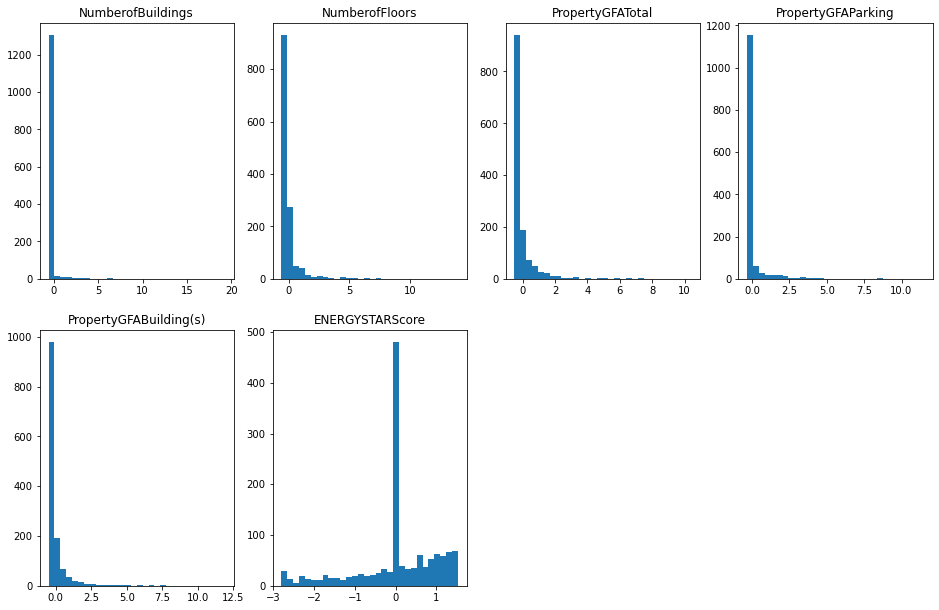

In [113]:
fig = plt.figure(figsize=(16,16))
for i in range(len(df_X_cont_train.columns.tolist()[:6])):
    ax = fig.add_subplot(3,4,(i+1))
    h = ax.hist(df_X_cont_train[df_X_cont_train.columns.tolist()[i]], 30)
    ax.set_title(df_X_cont_train.columns.tolist()[i])
    
plt.show()

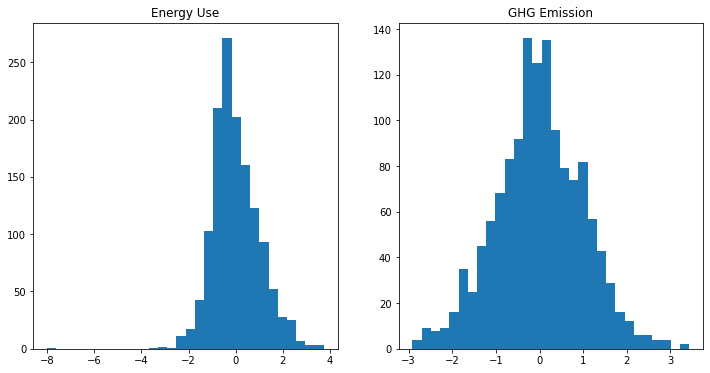

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.hist(y_energy_train, 30)
ax1.set_title('Energy Use')

ax2.hist(y_GHG_train, 30)
ax2.set_title('GHG Emission')

plt.show()

# Baseline Error (linear regression)

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

lr_energy = linear_model.LinearRegression()
lr_energy.fit(df_train, y_energy_train)

predict_energy = lr_energy.predict(df_test.values)
baseline_error_energy = np.mean((predict_energy - y_energy_test) ** 2)

lr_GHG = linear_model.LinearRegression()
lr_GHG.fit(df_train, y_GHG_train)

predict_GHG = lr_GHG.predict(df_test.values)
baseline_error_GHG = np.mean((predict_GHG - y_GHG_test) ** 2)

print("RMSE energy (linear regression) : ", np.sqrt(baseline_error_energy))
print("R2 energy (linear regression) : ", r2_score(y_energy_test, predict_energy))
print("RMSE GHG (linear regression) : ", np.sqrt(baseline_error_GHG))
print("R2 GHG (linear regression) : ", r2_score(y_GHG_test, predict_GHG))

RMSE energy (linear regression) :  2.4669917316647916e+16
R2 energy (linear regression) :  -6.39788827942525e+32
RMSE GHG (linear regression) :  1.6204984568759166e+16
R2 GHG (linear regression) :  -2.425152675020719e+32


#### We notice terrible results. We can check where they are coming from (even if it will not be possible when we generalize the model), to see where the errors may come from and if the model is really that bad.

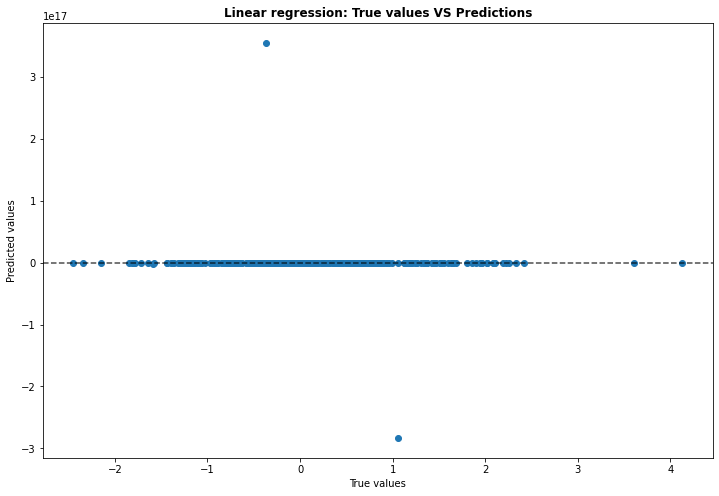

In [21]:
fig = plt.figure(figsize=(12,8))
plt.scatter(y_energy_test, predict_energy)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)
plt.xlabel('True values')
plt.ylabel('Predicted values')

plt.title('Linear regression: True values VS Predictions', fontsize=12, fontweight='bold')
plt.show()

#### The linear regression predicts a very small number of huge aberrations. We can try to manually remove them to see what happens (interquartile analysis)

In [22]:
df_modified = pd.DataFrame.from_dict({
    'Test': y_energy_test.ravel(),
    'Predict': predict_energy.ravel()
})
print("Before modification")
display(df_modified)

df_modified.sort_values(by=['Test'], ascending=True)
Q1 = df_modified['Predict'].quantile(.25)
Q3 = df_modified['Predict'].quantile(.75)
iqr = Q3 - Q1
lower = Q1 - 1.5*iqr #lower bound
upper = Q3 + 1.5*iqr  #upper bound
ind = df_modified.loc[(df_modified['Predict']>=upper) | (df_modified['Predict']<=lower)].index
df_modified.drop(df_modified.index[ind], inplace = True)

print("After modification")
display(df_modified)

Before modification


,Test,Predict
0,0.417923,-0.488281
1,0.519394,0.257812
2,1.149816,1.046875
3,4.125522,9.570312
4,0.398454,-0.300781
...,...,...
335,0.016987,-0.441406
336,1.159434,0.097656
337,-0.414919,-0.492188
338,-0.564723,-0.226562


After modification


,Test,Predict
0,0.417923,-0.488281
1,0.519394,0.257812
2,1.149816,1.046875
4,0.398454,-0.300781
5,1.127100,0.582031
...,...,...
335,0.016987,-0.441406
336,1.159434,0.097656
337,-0.414919,-0.492188
338,-0.564723,-0.226562


#### Dashed line: y=x ie predictions=real values ie what we want

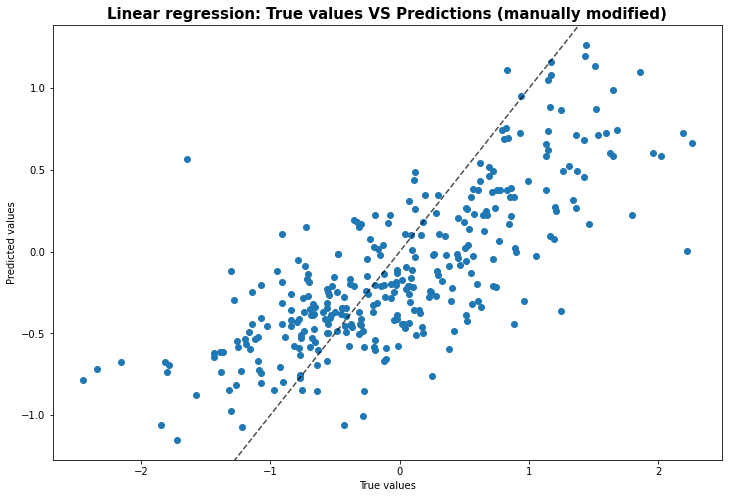

In [23]:
fig = plt.figure(figsize=(12,8))
plt.scatter(df_modified['Test'], df_modified['Predict'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

plt.xlabel('True values')
plt.ylabel('Predicted values')

plt.title('Linear regression: True values VS Predictions (manually modified)', fontsize=15, fontweight='bold')
plt.show()

In [24]:
print(r2_score(df_modified['Test'], df_modified['Predict']))

0.525736807250461


#### We obtain much better results. This means that most of the time, the algorithm gives results that are "correct", as much as can be expected from an algorithm as simple as a linear regression. The enormous error comes only from a few aberrations.
#### However it will not be possible to identify and correct these aberrations in reality, when we apply the model on new, unseen data. This model can therefore not be generalized and be pushed into production

# Ridge regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import timeit

n_alphas = 200
alpha_range = np.logspace(-2,4, n_alphas)
par_grid={
    'alpha': alpha_range,
    'fit_intercept':[True, False]
}

#ENERGY


model = Ridge(random_state=0)
ridge_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    verbose=1
)                   
ridge_energy.fit(df_train.values, y_energy_train.ravel())

print('Best hyperparams : ', ridge_energy.best_params_)
print('Best R2 : ', ridge_energy.best_score_)
print('Best estimator : ', ridge_energy.best_estimator_, "\n")

start_time_energy_ridge = timeit.default_timer() 

ridge_energy_best = ridge_energy.best_estimator_
ridge_energy_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_ridge = ridge_energy_best.predict(df_test.values)

r2_ridge_energy = r2_score(y_energy_test, predict_energy_ridge)
rmse_ridge_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_ridge))

time_energy_ridge = timeit.default_timer() - start_time_energy_ridge

print('R2 with best estimator (ridge energy) : ', r2_score(y_energy_test, predict_energy_ridge))
print('RMSE with best estimator (ridge energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_ridge)))
print('Run time (Ridge energy) : ', time_energy_ridge)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best hyperparams :  {'alpha': 310.7866187782014, 'fit_intercept': False}
Best R2 :  0.5602785819848737
Best estimator :  Ridge(alpha=310.7866187782014, fit_intercept=False, random_state=0) 

R2 with best estimator (ridge energy) :  0.23829076108264213
RMSE with best estimator (ridge energy) :  0.8512242343522527
Run time (Ridge energy) :  0.0018896999999924446


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    2.9s finished


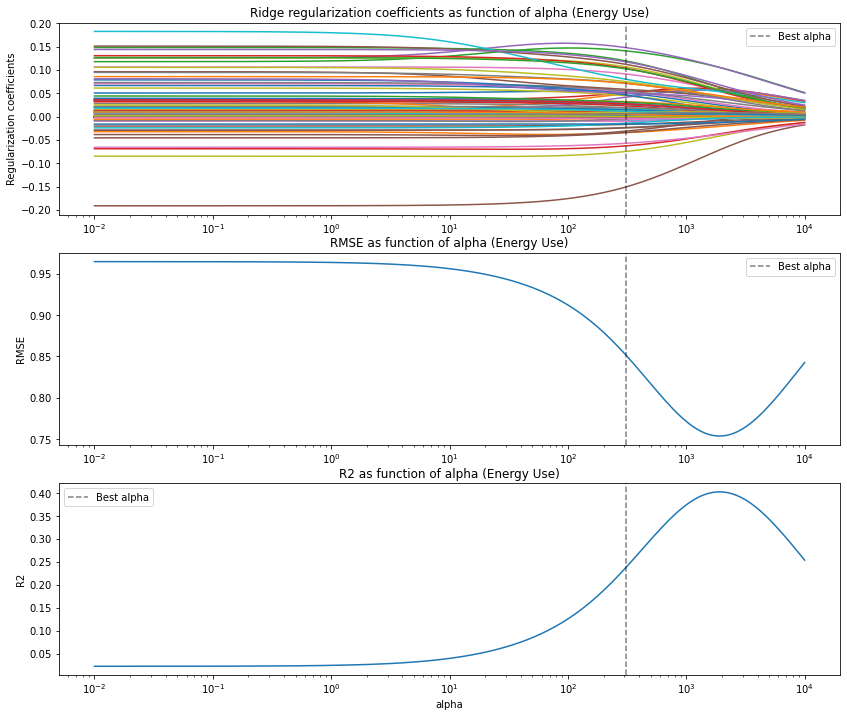

In [26]:
# Get regularization coefficients, RMSE and r2 as function of alpha
coefs_energy_ridge = []
errors_energy_ridge = []
r2_energy_ridge = []

for a in alpha_range:
    ridge = Ridge(alpha=a, fit_intercept=False, random_state=0)
    ridge.fit(df_train.values, y_energy_train.ravel())
    predict_energy_ridge = ridge.predict(df_test.values)
    
    coefs_energy_ridge.append(ridge.coef_)
    errors_energy_ridge.append(np.sqrt(mean_squared_error(y_energy_test, predict_energy_ridge)))
    r2_energy_ridge.append(r2_score(y_energy_test, predict_energy_ridge))

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(14,12))

ax1.plot(alpha_range, coefs_energy_ridge)
ax1.set_xscale('log')
#ax1.set_xlabel('alpha')
ax1.set_ylabel('Regularization coefficients')
ax1.set_title('Ridge regularization coefficients as function of alpha (Energy Use)')
ax1.axvline(x=ridge_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax1.legend()

ax2.plot(alpha_range, errors_energy_ridge)
ax2.set_xscale('log')
#ax2.set_xlabel('alpha')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE as function of alpha (Energy Use)')
ax2.axvline(x=ridge_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax2.legend()

ax3.plot(alpha_range, r2_energy_ridge)
ax3.set_xscale('log')
ax3.set_xlabel('alpha')
ax3.set_ylabel('R2')
ax3.set_title('R2 as function of alpha (Energy Use)')
ax3.axvline(x=ridge_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax3.legend()

plt.axis('tight')
plt.show()

In [27]:
#GHG

model = Ridge(random_state=0)
ridge_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    verbose=1
)                  
ridge_GHG.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams : ', ridge_GHG.best_params_)
print('Best R2 : ', ridge_GHG.best_score_)
print('Best estimator : ', ridge_GHG.best_estimator_, "\n")

start_time_GHG_ridge = timeit.default_timer() 

ridge_GHG_best = ridge_GHG.best_estimator_
ridge_GHG_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_ridge = ridge_GHG_best.predict(df_test.values)

r2_ridge_GHG = r2_score(y_GHG_test, predict_GHG_ridge)
rmse_ridge_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_ridge))

time_GHG_ridge = timeit.default_timer() - start_time_GHG_ridge

print('R2 with best estimator (ridge GHG) : ', r2_score(y_GHG_test, predict_GHG_ridge))
print('RMSE with best estimator (ridge GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_ridge)))
print('Run time (Ridge GHG) : ', time_GHG_ridge)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best hyperparams :  {'alpha': 235.42864143224153, 'fit_intercept': False}
Best R2 :  0.5794680075623686
Best estimator :  Ridge(alpha=235.42864143224153, fit_intercept=False, random_state=0) 

R2 with best estimator (ridge GHG) :  0.2964789940585044
RMSE with best estimator (ridge GHG) :  0.8728057809053344
Run time (Ridge GHG) :  0.0014134000000467495


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    2.9s finished


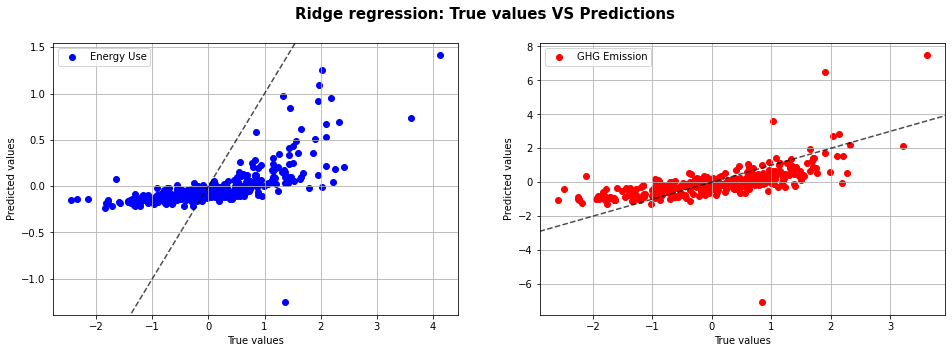

In [28]:
x = np.linspace(-3, 5, 30)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.scatter(y_energy_test, predict_energy_ridge, c='b', label='Energy Use')
ax1.set_xlabel('True values')
ax1.set_ylabel('Predicted values')

xpoints = ypoints = ax1.get_xlim()
ax1.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax1.legend()
ax1.grid()

#ax2.plot(x, x, c='k', alpha=.7)
ax2.scatter(y_GHG_test, predict_GHG_ridge, c='r', label='GHG Emission')
ax2.set_xlabel('True values')
ax2.set_ylabel('Predicted values')

xpoints = ypoints = ax2.get_xlim()
ax2.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax2.legend()
ax2.grid()



fig.suptitle('Ridge regression: True values VS Predictions', fontsize=15, fontweight='bold')
plt.show()

#### Ridge algorithm performs poorly, especially on the energy use part

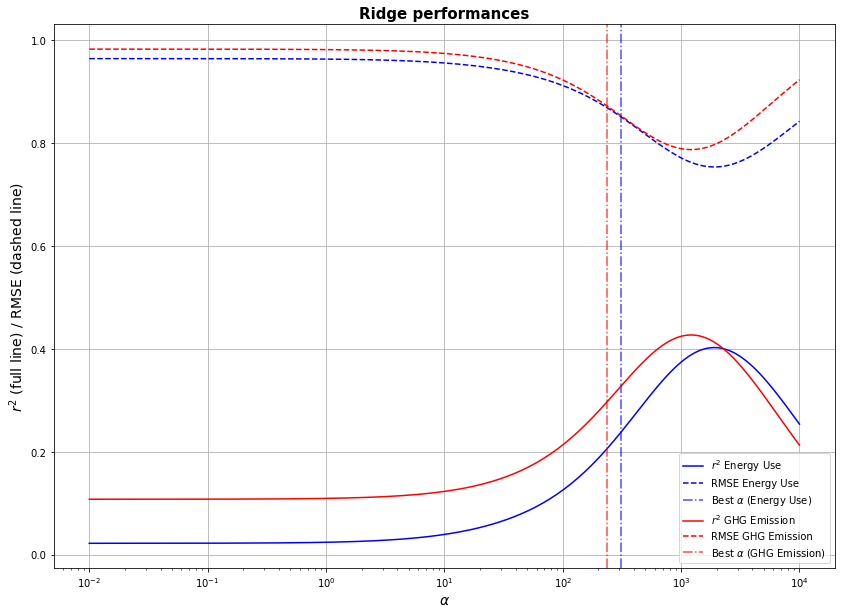

In [29]:
errors_GHG_ridge = []
r2_GHG_ridge = []

for a in alpha_range:
    ridge = Ridge(alpha=a, fit_intercept=False, random_state=0)
    ridge.fit(df_train.values, y_GHG_train.ravel())
    predict_GHG_ridge = ridge.predict(df_test.values)
    
    errors_GHG_ridge.append(np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_ridge)))
    r2_GHG_ridge.append(r2_score(y_GHG_test, predict_GHG_ridge))

fig=plt.figure(figsize=(14,10))
plt.plot(alpha_range, r2_energy_ridge, c='b', label=r'$r^2$ Energy Use')
plt.plot(alpha_range, errors_energy_ridge, c='b', linestyle='--', label='RMSE Energy Use')
plt.axvline(x=ridge_energy.best_params_['alpha'], linestyle = '-.', color = 'b', alpha = .7, label=r'Best $\alpha$ (Energy Use)')

plt.plot(alpha_range, r2_GHG_ridge, c='r', label=r'$r^2$ GHG Emission')
plt.plot(alpha_range, errors_GHG_ridge, c='r', linestyle='--', label='RMSE GHG Emission')
plt.axvline(x=ridge_GHG.best_params_['alpha'], linestyle = '-.', color = 'r', alpha = .7, label=r'Best $\alpha$ (GHG Emission)')


plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'$r^2$ (full line) / RMSE (dashed line)', fontsize=14)
plt.title('Ridge performances', fontsize=15,fontweight='bold')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [30]:
perf_ridge = [
    r2_ridge_energy,
    rmse_ridge_energy,
    r2_ridge_GHG,
    rmse_ridge_GHG,
    time_energy_ridge,
    time_GHG_ridge
]

# Lasso

In [31]:
from sklearn.linear_model import Lasso

#ENERGY

par_grid={
    'alpha': alpha_range,
    'fit_intercept':[True, False]
}
model = Lasso(random_state=0)
lasso_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    verbose=1
)
                 
lasso_energy.fit(df_train.values, y_energy_train.ravel())

print('Best hyperparams : ', lasso_energy.best_params_)
print('Best R2 : ', lasso_energy.best_score_)
print('Best estimator : ', lasso_energy.best_estimator_, "\n")

start_time_energy_lasso = timeit.default_timer() 

lasso_energy_best = lasso_energy.best_estimator_
lasso_energy_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_lasso = lasso_energy_best.predict(df_test.values)

r2_lasso_energy = r2_score(y_energy_test, predict_energy_lasso)
rmse_lasso_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_lasso))

time_energy_lasso = timeit.default_timer() - start_time_energy_lasso

print('R2 with best estimator (Lasso energy) : ', r2_score(y_energy_test, predict_energy_lasso))
print('RMSE with best estimator (Lasso energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_lasso)))
print('Run time (Lasso energy) : ', time_energy_lasso)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best hyperparams :  {'alpha': 0.01867913599020783, 'fit_intercept': True}
Best R2 :  0.5594841291506311
Best estimator :  Lasso(alpha=0.01867913599020783, random_state=0) 

R2 with best estimator (Lasso energy) :  0.5024582734422416
RMSE with best estimator (Lasso energy) :  0.6879614803127186
Run time (Lasso energy) :  0.0065038000000186


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    4.1s finished


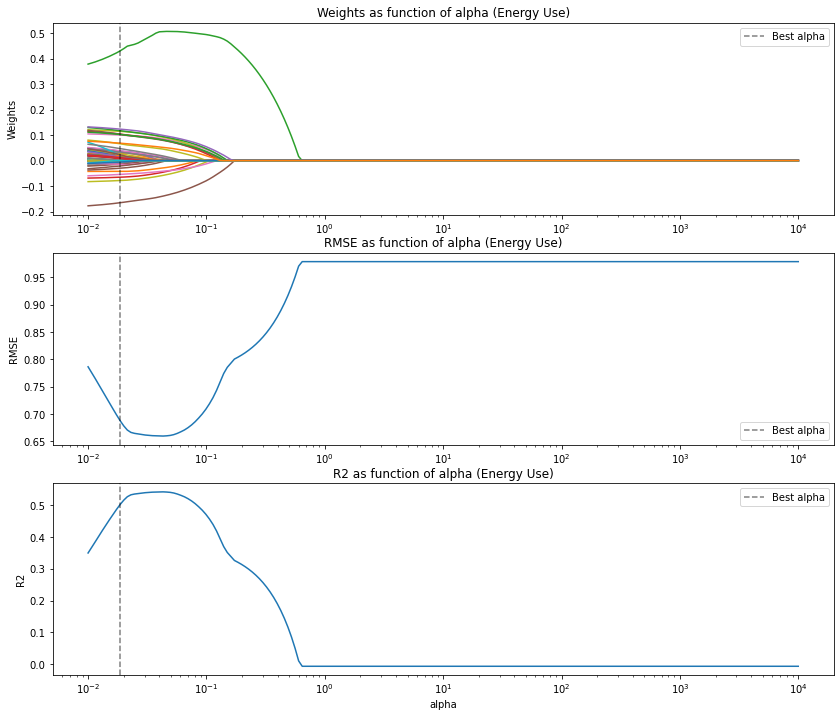

In [32]:
# Get reguarization coefficients, RMSE and r2 as function of alpha
coefs_energy_lasso = []
errors_energy_lasso = []
r2_energy_lasso = []

for a in alpha_range:
    lasso = Lasso(alpha=a, fit_intercept=False, random_state=0)
    lasso.fit(df_train.values, y_energy_train.ravel())
    predict_energy_lasso = lasso.predict(df_test.values)
    
    coefs_energy_lasso.append(lasso.coef_)
    errors_energy_lasso.append(np.sqrt(mean_squared_error(y_energy_test, predict_energy_lasso)))
    r2_energy_lasso.append(r2_score(y_energy_test, predict_energy_lasso))

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(14,12))

ax1.plot(alpha_range, coefs_energy_lasso)
ax1.set_xscale('log')
#ax1.set_xlabel('alpha')
ax1.set_ylabel('Weights')
ax1.set_title('Weights as function of alpha (Energy Use)')
ax1.axvline(x=lasso_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax1.legend()

ax2.plot(alpha_range, errors_energy_lasso)
ax2.set_xscale('log')
#ax2.set_xlabel('alpha')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE as function of alpha (Energy Use)')
ax2.axvline(x=lasso_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax2.legend()

ax3.plot(alpha_range, r2_energy_lasso)
ax3.set_xscale('log')
ax3.set_xlabel('alpha')
ax3.set_ylabel('R2')
ax3.set_title('R2 as function of alpha (Energy Use)')
ax3.axvline(x=lasso_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax3.legend()

plt.axis('tight')
plt.show()

In [33]:
#GHG


model = Lasso(random_state=0)
lasso_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    verbose=1
)
                
lasso_GHG.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams : ', lasso_GHG.best_params_)
print('Best R2 : ', lasso_GHG.best_score_)
print('Best estimator : ', lasso_GHG.best_estimator_, "\n")

start_time_GHG_lasso = timeit.default_timer()    

lasso_GHG_best = lasso_GHG.best_estimator_
lasso_GHG_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_lasso = lasso_GHG_best.predict(df_test.values)

r2_lasso_GHG = r2_score(y_GHG_test, predict_GHG_lasso)
rmse_lasso_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_lasso))

time_GHG_lasso = timeit.default_timer() - start_time_GHG_lasso

print('R2 with best estimator (Lasso GHG) : ', r2_score(y_GHG_test, predict_GHG_lasso))
print('RMSE with best estimator (Lasso GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_lasso)))
print('Run time (Lasso GHG) : ', time_GHG_lasso)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best hyperparams :  {'alpha': 0.01320088400831418, 'fit_intercept': False}
Best R2 :  0.5898071152715108
Best estimator :  Lasso(alpha=0.01320088400831418, fit_intercept=False, random_state=0) 

R2 with best estimator (Lasso GHG) :  0.46547643832713315
RMSE with best estimator (Lasso GHG) :  0.7607859897065714
Run time (Lasso GHG) :  0.008433099999820115


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    5.8s finished


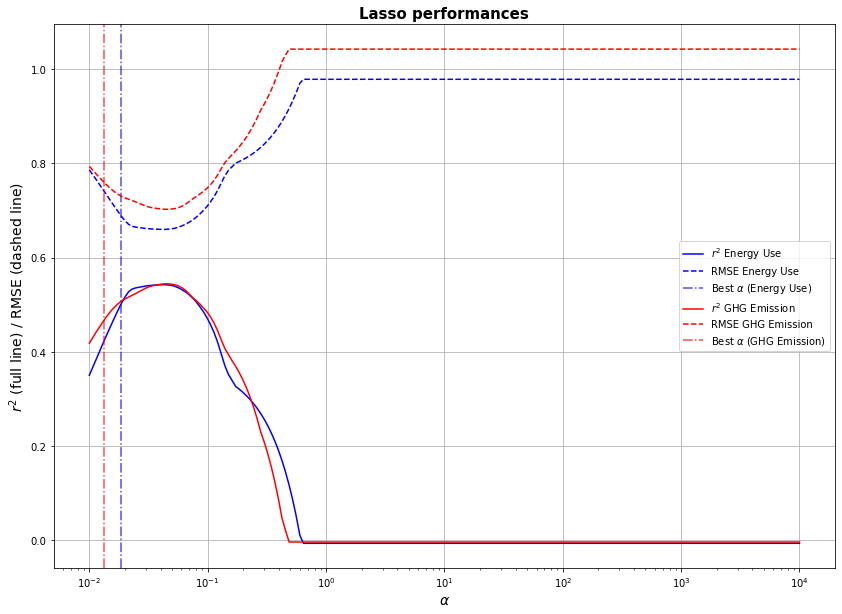

In [34]:
errors_GHG_lasso = []
r2_GHG_lasso = []

for a in alpha_range:
    lasso = Lasso(alpha=a, fit_intercept=False, random_state=0)
    lasso.fit(df_train.values, y_GHG_train.ravel())
    predict_GHG_lasso = lasso.predict(df_test.values)
    
    errors_GHG_lasso.append(np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_lasso)))
    r2_GHG_lasso.append(r2_score(y_GHG_test, predict_GHG_lasso))

fig=plt.figure(figsize=(14,10))
plt.plot(alpha_range, r2_energy_lasso, c='b', label=r'$r^2$ Energy Use')
plt.plot(alpha_range, errors_energy_lasso, c='b', linestyle='--', label='RMSE Energy Use')
plt.axvline(x=lasso_energy.best_params_['alpha'], linestyle = '-.', color = 'b', alpha = .7, label=r'Best $\alpha$ (Energy Use)')

plt.plot(alpha_range, r2_GHG_lasso, c='r', label=r'$r^2$ GHG Emission')
plt.plot(alpha_range, errors_GHG_lasso, c='r', linestyle='--', label='RMSE GHG Emission')
plt.axvline(x=lasso_GHG.best_params_['alpha'], linestyle = '-.', color = 'r', alpha = .7, label=r'Best $\alpha$ (GHG Emission)')


plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'$r^2$ (full line) / RMSE (dashed line)', fontsize=14)
plt.title('Lasso performances', fontsize=15,fontweight='bold')
plt.xscale('log')
plt.legend()
plt.grid()

In [35]:
perf_lasso = [
    r2_lasso_energy,
    rmse_lasso_energy,
    r2_lasso_GHG,
    rmse_lasso_GHG,
    time_energy_lasso,
    time_GHG_lasso
]

#### Lasso performs better than ridge, but is still average/bad

# Elastic Net
#### The GridSearchCV take about 2minutes to run using 4 cores

In [36]:
from sklearn.linear_model import ElasticNet
#ENERGY

l1_ratio_range = np.linspace(0.001, 1, 50)
par_grid={
    'alpha': alpha_range,
    'l1_ratio': l1_ratio_range,
    'fit_intercept':[True, False]
}

model = ElasticNet(random_state=0)
elastic_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)
                 
elastic_energy.fit(df_train.values, y_energy_train.ravel())

   

print('Best hyperparams : ', elastic_energy.best_params_)
print('Best R2 : ', elastic_energy.best_score_)
print('Best estimator : ', elastic_energy.best_estimator_, '\n')

start_time_energy_elastic = timeit.default_timer()

elastic_energy_best = elastic_energy.best_estimator_
elastic_energy_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_elastic = elastic_energy_best.predict(df_test.values)

r2_elastic_energy = r2_score(y_energy_test, predict_energy_elastic)
rmse_elastic_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_elastic))

time_energy_elastic = timeit.default_timer() - start_time_energy_elastic

print('R2 with best estimator (Elastic Net energy) : ', r2_score(y_energy_test, predict_energy_elastic))
print('RMSE with best estimator (Elastic Net energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_elastic)))
print('Run time (Elastic Net energy) : ', time_energy_elastic)

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1288 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 4232 tasks      | elapsed:   20.7s
[Parallel(n_jobs=4)]: Done 9832 tasks      | elapsed:   41.6s
[Parallel(n_jobs=4)]: Done 20904 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 41192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 82792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 100000 out of 100000 | elapsed:  2.2min finished


Best hyperparams :  {'alpha': 0.14992684327860456, 'fit_intercept': False, 'l1_ratio': 0.062163265306122456}
Best R2 :  0.5659873063093828
Best estimator :  ElasticNet(alpha=0.14992684327860456, fit_intercept=False,
           l1_ratio=0.062163265306122456, random_state=0) 

R2 with best estimator (Elastic Net energy) :  0.390118254904379
RMSE with best estimator (Elastic Net energy) :  0.7616793560978895
Run time (Elastic Net energy) :  0.00283560000025318


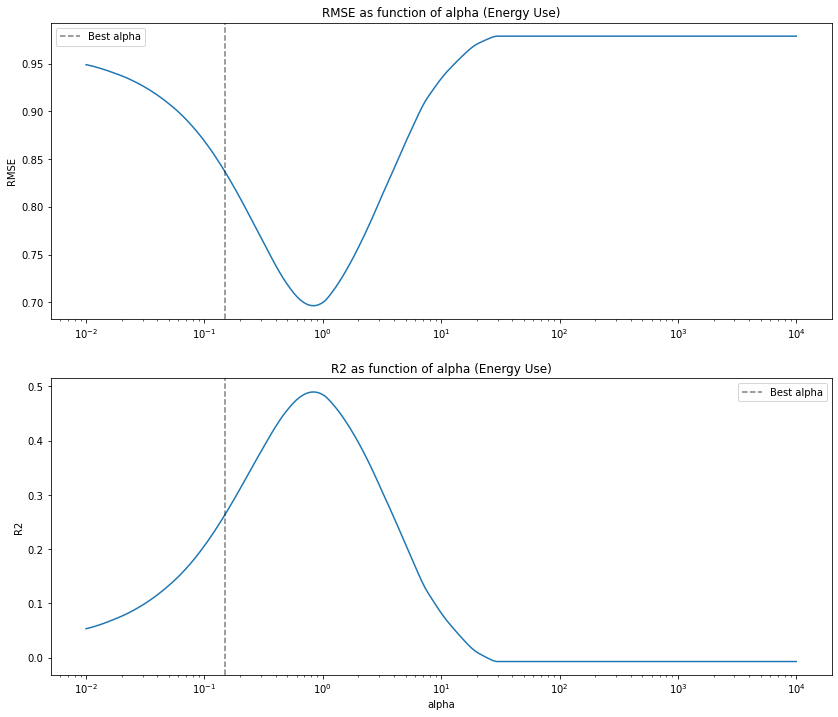

In [37]:
# Get RMSE and r2 as function of alpha

errors_energy_elastic = []
r2_energy_elastic = []

for a in alpha_range:
    elastic = ElasticNet(alpha=a, fit_intercept=False, l1_ratio=0.021387755102040818, random_state=0)
    elastic.fit(df_train.values, y_energy_train.ravel())
    predict_energy_elastic = elastic.predict(df_test.values)
    
    errors_energy_elastic.append(np.sqrt(mean_squared_error(y_energy_test, predict_energy_elastic)))
    r2_energy_elastic.append(r2_score(y_energy_test, predict_energy_elastic))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,12))

ax1.plot(alpha_range, errors_energy_elastic)
ax1.set_xscale('log')
#ax1.set_xlabel('alpha')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE as function of alpha (Energy Use)')
ax1.axvline(x=elastic_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax1.legend()

ax2.plot(alpha_range, r2_energy_elastic)
ax2.set_xscale('log')
ax2.set_xlabel('alpha')
ax2.set_ylabel('R2')
ax2.set_title('R2 as function of alpha (Energy Use)')
ax2.axvline(x=elastic_energy.best_params_['alpha'], linestyle = '--', color = 'k', alpha = .5, label='Best alpha')
ax2.legend()

plt.axis('tight')
plt.show()

In [38]:
#GHG

model = ElasticNet(random_state=0)
elastic_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)
              
elastic_GHG.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams : ', elastic_GHG.best_params_)
print('Best R2 : ', elastic_GHG.best_score_)
print('Best estimator : ', elastic_GHG.best_estimator_, '\n')

start_time_GHG_elastic = timeit.default_timer()    

elastic_GHG_best = elastic_GHG.best_estimator_
elastic_GHG_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_elastic = elastic_GHG_best.predict(df_test.values)

r2_elastic_GHG = r2_score(y_GHG_test, predict_GHG_elastic)
rmse_elastic_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_elastic))

time_GHG_elastic = timeit.default_timer() - start_time_GHG_elastic

print('R2 with best estimator (Elastic Net GHG) : ', r2_score(y_GHG_test, predict_GHG_elastic))
print('RMSE with best estimator (Elastic Net GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_elastic)))
print('Run time (Elastic Net GHG) : ', time_GHG_elastic)

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 2680 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 6680 tasks      | elapsed:   26.0s
[Parallel(n_jobs=4)]: Done 12280 tasks      | elapsed:   40.1s
[Parallel(n_jobs=4)]: Done 25720 tasks      | elapsed:   59.1s
[Parallel(n_jobs=4)]: Done 55864 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 97464 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 100000 out of 100000 | elapsed:  2.2min finished


Best hyperparams :  {'alpha': 0.04605922041145106, 'fit_intercept': False, 'l1_ratio': 0.26604081632653065}
Best R2 :  0.590845650648357
Best estimator :  ElasticNet(alpha=0.04605922041145106, fit_intercept=False,
           l1_ratio=0.26604081632653065, random_state=0) 

R2 with best estimator (Elastic Net GHG) :  0.46366540773103215
RMSE with best estimator (Elastic Net GHG) :  0.7620737174439469
Run time (Elastic Net GHG) :  0.009849600000052305


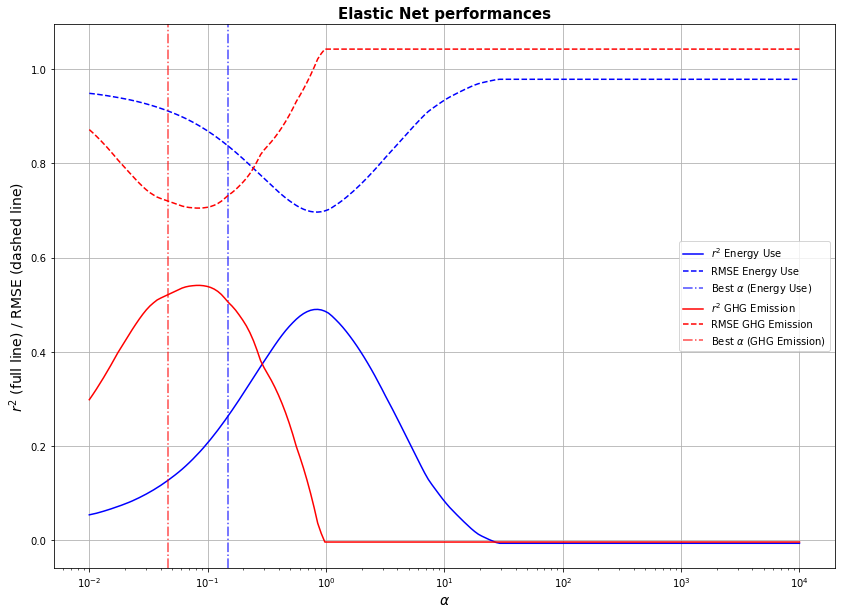

In [39]:
errors_GHG_elastic = []
r2_GHG_elastic = []

for a in alpha_range:
    elastic = ElasticNet(alpha=a, fit_intercept=False, random_state=0)
    elastic.fit(df_train.values, y_GHG_train.ravel())
    predict_GHG_elastic = elastic.predict(df_test.values)
    
    errors_GHG_elastic.append(np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_elastic)))
    r2_GHG_elastic.append(r2_score(y_GHG_test, predict_GHG_elastic))

fig=plt.figure(figsize=(14,10))
plt.plot(alpha_range, r2_energy_elastic, c='b', label=r'$r^2$ Energy Use')
plt.plot(alpha_range, errors_energy_elastic, c='b', linestyle='--', label='RMSE Energy Use')
plt.axvline(x=elastic_energy.best_params_['alpha'], linestyle = '-.', color = 'b', alpha = .7, label=r'Best $\alpha$ (Energy Use)')

plt.plot(alpha_range, r2_GHG_elastic, c='r', label=r'$r^2$ GHG Emission')
plt.plot(alpha_range, errors_GHG_elastic, c='r', linestyle='--', label='RMSE GHG Emission')
plt.axvline(x=elastic_GHG.best_params_['alpha'], linestyle = '-.', color = 'r', alpha = .7, label=r'Best $\alpha$ (GHG Emission)')


plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'$r^2$ (full line) / RMSE (dashed line)', fontsize=14)
plt.title('Elastic Net performances', fontsize=15,fontweight='bold')
plt.xscale('log')
plt.legend()
plt.grid()

In [40]:
perf_elastic = [
    r2_elastic_energy,
    rmse_elastic_energy,
    r2_elastic_GHG,
    rmse_elastic_GHG,
    time_energy_elastic,
    time_GHG_elastic
]

#### Elastic Net performs better than ridge, but worse than Lasso

# SVR linear
#### The GridSearch takes about 12 minutes to run using 4 cores

In [41]:
from sklearn.svm import SVR
#ENERGY


C_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 2, 5)
epsilon_range = np.logspace(-2, 2, 5)
par_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range
}
model = SVR(kernel="linear")

SVR_energy_lin = GridSearchCV(
    model,param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)                 
SVR_energy_lin.fit(df_train.values, y_energy_train.ravel())

print('Best hyperparams', SVR_energy_lin.best_params_)
print('Best R2', SVR_energy_lin.best_score_)
print('Best estimator : ', SVR_energy_lin.best_estimator_, '\n')

start_time_energy_SVR_lin = timeit.default_timer()  

SVR_energy_lin_best = SVR_energy_lin.best_estimator_
SVR_energy_lin_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_SVR_lin = SVR_energy_lin_best.predict(df_test.values)

r2_SVR_lin_energy = r2_score(y_energy_test, predict_energy_SVR_lin)
rmse_SVR_lin_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_SVR_lin))

time_energy_SVR_lin = timeit.default_timer() - start_time_energy_SVR_lin

print('R2 with best estimator (SVR linear energy) : ', r2_score(y_energy_test, predict_energy_SVR_lin))
print('RMSE with best estimator (SVR linear energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_SVR_lin)))
print('Run time (SVR linear energy) : ', time_energy_SVR_lin)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 516 tasks      | elapsed:  4.7min


Best hyperparams {'C': 0.01, 'epsilon': 1.0, 'gamma': 0.01}
Best R2 0.5338954409388935
Best estimator :  SVR(C=0.01, epsilon=1.0, gamma=0.01, kernel='linear') 

R2 with best estimator (SVR linear energy) :  0.5095200092128616
RMSE with best estimator (SVR linear energy) :  0.6830618268882211
Run time (SVR linear energy) :  0.024629499999718973


[Parallel(n_jobs=4)]: Done 625 out of 625 | elapsed: 13.2min finished


In [42]:
#GHG

model = SVR(kernel="linear")

SVR_GHG_lin = GridSearchCV(
    model,param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)                    
SVR_GHG_lin.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams', SVR_GHG_lin.best_params_)
print('Best R2', SVR_GHG_lin.best_score_)
print('Best estimator : ', SVR_GHG_lin.best_estimator_, '\n')

start_time_GHG_SVR_lin = timeit.default_timer()

SVR_GHG_lin_best = SVR_GHG_lin.best_estimator_
SVR_GHG_lin_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_SVR_lin = SVR_GHG_lin_best.predict(df_test.values)

r2_SVR_lin_GHG = r2_score(y_GHG_test, predict_GHG_SVR_lin)
rmse_SVR_lin_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_SVR_lin))

time_GHG_SVR_lin = timeit.default_timer() - start_time_GHG_SVR_lin

print('R2 with best estimator (SVR linear GHG) : ', r2_score(y_GHG_test, predict_GHG_SVR_lin))
print('RMSE with best estimator (SVR linear GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_SVR_lin)))
print('Run time (SVR linear GHG) : ', time_GHG_SVR_lin)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.4s


Best hyperparams {'C': 0.01, 'epsilon': 1.0, 'gamma': 0.01}
Best R2 0.5569170833368087
Best estimator :  SVR(C=0.01, epsilon=1.0, gamma=0.01, kernel='linear') 

R2 with best estimator (SVR linear GHG) :  0.4915288531781985
RMSE with best estimator (SVR linear GHG) :  0.7420142340318708
Run time (SVR linear GHG) :  0.02737410000008822


[Parallel(n_jobs=4)]: Done 625 out of 625 | elapsed: 12.1min finished


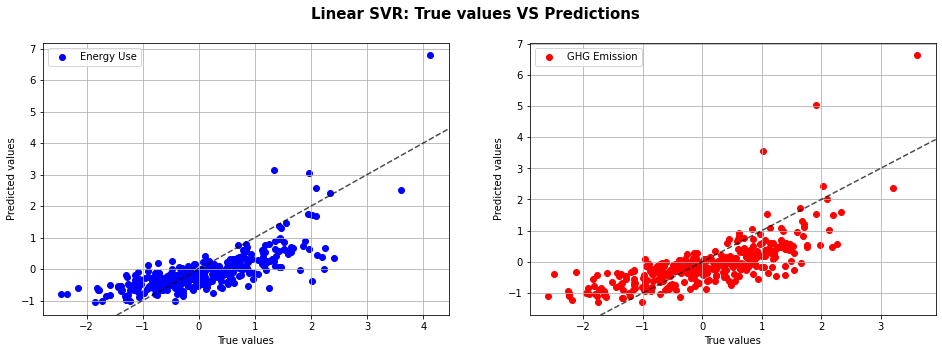

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
 
ax1.scatter(y_energy_test, predict_energy_SVR_lin, c='b', label='Energy Use')
ax1.set_xlabel('True values')
ax1.set_ylabel('Predicted values')

xpoints = ypoints = ax1.get_xlim()
ax1.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax1.legend()
ax1.grid()

ax2.scatter(y_GHG_test, predict_GHG_SVR_lin, c='r', label='GHG Emission')
ax2.set_xlabel('True values')
ax2.set_ylabel('Predicted values')

xpoints = ypoints = ax2.get_xlim()
ax2.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax2.legend()
ax2.grid()

fig.suptitle('Linear SVR: True values VS Predictions', fontsize=15, fontweight='bold')
plt.show()

In [44]:
perf_SVR_lin = [
    r2_SVR_lin_energy,
    rmse_SVR_lin_energy,
    r2_SVR_lin_GHG,
    rmse_SVR_lin_GHG,
    time_energy_SVR_lin,
    time_GHG_SVR_lin
]

#### The linear SVR performs about the same as Lasso

# SVR rbf

In [45]:
#ENERGY
C_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-4, 0, 5)
epsilon_range = np.logspace(-2, 2, 5)
par_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range
}
model = SVR(kernel="rbf")

SVR_energy_rbf = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)
SVR_energy_rbf.fit(df_train.values, y_energy_train.ravel())

print('Best hyperparams', SVR_energy_rbf.best_params_)
print('Best R2', SVR_energy_rbf.best_score_)
print('Best estimator : ', SVR_energy_rbf.best_estimator_, '\n')

start_time_energy_SVR_rbf = timeit.default_timer()  

SVR_energy_rbf_best = SVR_energy_rbf.best_estimator_
SVR_energy_rbf_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_SVR_rbf = SVR_energy_rbf_best.predict(df_test.values)

r2_SVR_rbf_energy = r2_score(y_energy_test, predict_energy_SVR_rbf)
rmse_SVR_rbf_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_SVR_rbf))

time_energy_SVR_rbf = timeit.default_timer() - start_time_energy_SVR_rbf

print('R2 with best estimator (SVR rbf energy) : ', r2_score(y_energy_test, predict_energy_SVR_rbf))
print('RMSE with best estimator (SVR rbf energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_SVR_rbf)))
print('Run time (SVR rbf energy) : ', time_energy_SVR_rbf)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 625 out of 625 | elapsed:   12.4s finished


Best hyperparams {'C': 10.0, 'epsilon': 0.1, 'gamma': 0.01}
Best R2 0.6911828250847646
Best estimator :  SVR(C=10.0, gamma=0.01) 

R2 with best estimator (SVR rbf energy) :  0.6829260317470525
RMSE with best estimator (SVR rbf energy) :  0.54919890394761
Run time (SVR rbf energy) :  0.21985979999999472


In [46]:
#GHG
model = SVR(kernel="rbf")

SVR_GHG_rbf = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)  
SVR_GHG_rbf.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams', SVR_GHG_rbf.best_params_)
print('Best R2', SVR_GHG_rbf.best_score_)
print('Best estimator : ', SVR_GHG_rbf.best_estimator_, '\n')

start_time_GHG_SVR_rbf = timeit.default_timer()  

SVR_GHG_rbf_best = SVR_GHG_rbf.best_estimator_
SVR_GHG_rbf_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_SVR_rbf = SVR_GHG_rbf_best.predict(df_test.values)

r2_SVR_rbf_GHG = r2_score(y_GHG_test, predict_GHG_SVR_rbf)
rmse_SVR_rbf_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_SVR_rbf))

time_GHG_SVR_rbf = timeit.default_timer() - start_time_GHG_SVR_rbf

print('R2 with best estimator (SVR rbf GHG) : ', r2_score(y_GHG_test, predict_GHG_SVR_rbf))
print('RMSE with best estimator (SVR rbf GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_SVR_rbf)))
print('Run time (SVR rbf GHG) : ', time_GHG_SVR_rbf)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 625 out of 625 | elapsed:   13.4s finished


Best hyperparams {'C': 10.0, 'epsilon': 0.1, 'gamma': 0.01}
Best R2 0.6813162495572058
Best estimator :  SVR(C=10.0, gamma=0.01) 

R2 with best estimator (SVR rbf GHG) :  0.6645952437813905
RMSE with best estimator (SVR rbf GHG) :  0.6026479559510401
Run time (SVR rbf GHG) :  0.2325832999999875


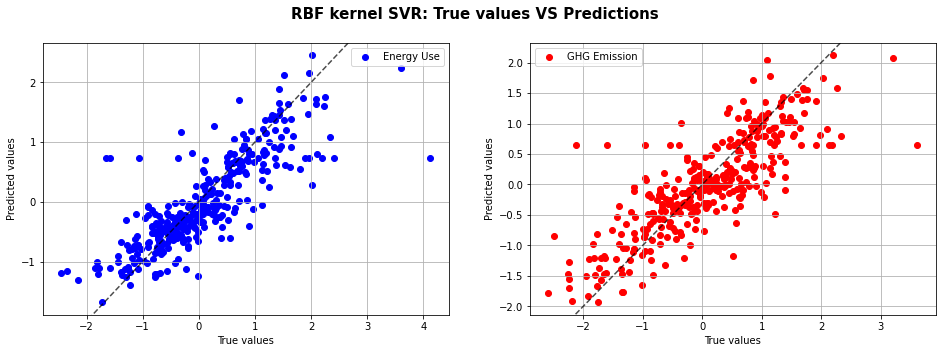

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
 
ax1.scatter(y_energy_test, predict_energy_SVR_rbf, c='b', label='Energy Use')
ax1.set_xlabel('True values')
ax1.set_ylabel('Predicted values')

xpoints = ypoints = ax1.get_xlim()
ax1.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax1.legend()
ax1.grid()

ax2.scatter(y_GHG_test, predict_GHG_SVR_rbf, c='r', label='GHG Emission')
ax2.set_xlabel('True values')
ax2.set_ylabel('Predicted values')

xpoints = ypoints = ax2.get_xlim()
ax2.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax2.legend()
ax2.grid()

fig.suptitle('RBF kernel SVR: True values VS Predictions', fontsize=15, fontweight='bold')
plt.show()

In [48]:
perf_SVR_rbf = [
    r2_SVR_rbf_energy,
    rmse_SVR_rbf_energy,
    r2_SVR_rbf_GHG,
    rmse_SVR_rbf_GHG,
    time_energy_SVR_rbf,
    time_GHG_SVR_rbf
]

#### Kernel SVR performs much better than the linear algorithms

# Random Forest
#### Takes about 1.5 min to run using 4 cores

In [49]:
from sklearn.ensemble import RandomForestRegressor


#ENERGY
max_depth_range = [25, 50, 100, 200, 300, 500]
min_samples_split_range = [1, 2, 3, 5]
max_features_range = ['sqrt', 'log2', None]
min_samples_leaf_range = [1, 2, 3, 5]

par_grid = {
    'max_depth': max_depth_range,
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range,
    'max_features': max_features_range
}
    
model = RandomForestRegressor(n_estimators=100, random_state=0)

rf_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
) 
rf_energy.fit(df_train.values, y_energy_train.ravel())

print('Best hyperparams', rf_energy.best_params_)
print('Best R2', rf_energy.best_score_)
print('Best estimator : ', rf_energy.best_estimator_, '\n')

start_time_energy_rf = timeit.default_timer()

rf_energy_best = rf_energy.best_estimator_
rf_energy_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_rf = rf_energy_best.predict(df_test.values)

r2_rf_energy = r2_score(y_energy_test, predict_energy_rf)
rmse_rf_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_rf))

time_energy_rf = timeit.default_timer() - start_time_energy_rf

print('R2 with best estimator (Random Forest energy) : ', r2_score(y_energy_test, predict_energy_rf))
print('RMSE with best estimator (Random Forest energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_rf)))
print('Run time (Random forest energy) : ', time_energy_rf)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 558 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done 928 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1398 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed:  1.6min finished


Best hyperparams {'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best R2 0.7352062110063329
Best estimator :  RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_split=3,
                      random_state=0) 

R2 with best estimator (Random Forest energy) :  0.7583440079979588
RMSE with best estimator (Random Forest energy) :  0.4794553311116028
Run time (Random forest energy) :  0.24203440000019327


In [50]:
#GHG
model = RandomForestRegressor(n_estimators=100, random_state=0)

rf_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)
rf_GHG.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams', rf_GHG.best_params_)
print('Best R2', rf_GHG.best_score_)
print('Best estimator : ', rf_GHG.best_estimator_, '\n')

start_time_GHG_rf = timeit.default_timer()

rf_GHG_best = rf_GHG.best_estimator_
rf_GHG_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_rf = rf_GHG_best.predict(df_test.values)

r2_rf_GHG = r2_score(y_GHG_test, predict_GHG_rf)
rmse_rf_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_rf))

time_GHG_rf = timeit.default_timer() - start_time_GHG_rf

print('R2 with best estimator (Random Forest GHG) : ', r2_score(y_GHG_test, predict_GHG_rf))
print('RMSE with best estimator (Random Forest GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_rf)))
print('Run time (Random forest GHG) : ', time_GHG_rf)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 538 tasks      | elapsed:   33.6s
[Parallel(n_jobs=4)]: Done 944 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed:  1.6min finished


Best hyperparams {'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best R2 0.7357560014609861
Best estimator :  RandomForestRegressor(max_depth=25, max_features=None, min_samples_split=3,
                      random_state=0) 

R2 with best estimator (Random Forest GHG) :  0.7339431983981143
RMSE with best estimator (Random Forest GHG) :  0.5367428432437348
Run time (Random forest GHG) :  0.7233145999998669


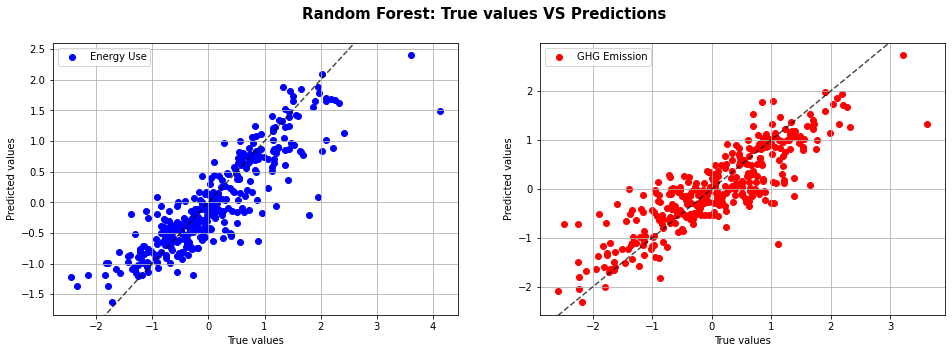

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
 
ax1.scatter(y_energy_test, predict_energy_rf, c='b', label='Energy Use')
ax1.set_xlabel('True values')
ax1.set_ylabel('Predicted values')

xpoints = ypoints = ax1.get_xlim()
ax1.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax1.legend()
ax1.grid()

ax2.scatter(y_GHG_test, predict_GHG_rf, c='r', label='GHG Emission')
ax2.set_xlabel('True values')
ax2.set_ylabel('Predicted values')

xpoints = ypoints = ax2.get_xlim()
ax2.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax2.legend()
ax2.grid()

fig.suptitle('Random Forest: True values VS Predictions', fontsize=15, fontweight='bold')
plt.show()

In [52]:
estimator_range = [5, 10, 15, 25, 50, 75, 100, 150, 200]
r2_energy_rf = []
rmse_energy_rf = []
times = []

for i in estimator_range:
    start_time = timeit.default_timer()
    
    rf_energy_best.set_params(n_estimators=i)
    rf_energy_best.fit(df_train.values, y_energy_train.ravel())
    predict_rf_energy = rf_energy_best.predict(df_test.values)
    
    r2_energy_rf.append(r2_score(y_energy_test, predict_rf_energy))
    rmse_energy_rf.append(np.sqrt(mean_squared_error(y_energy_test, predict_rf_energy)))
    times.append(timeit.default_timer() - start_time)


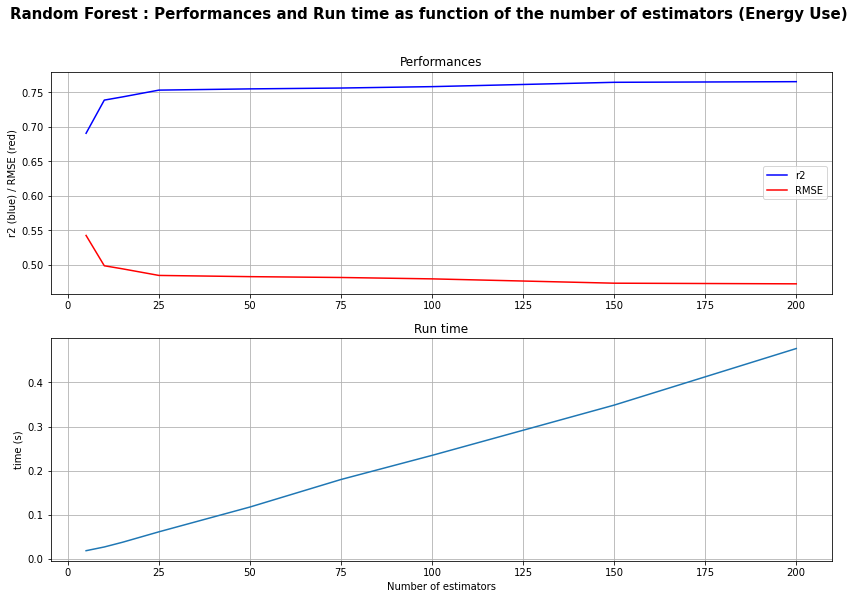

In [53]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,9))

ax1.plot(estimator_range, r2_energy_rf, c='b', label='r2')
ax1.plot(estimator_range, rmse_energy_rf, c='r', label='RMSE')
ax1.set_ylabel("r2 (blue) / RMSE (red)")
ax1.legend()
ax1.set_title('Performances')
ax1.grid()

ax2.plot(estimator_range, times)
ax2.set_ylabel('time (s)')
ax2.set_xlabel('Number of estimators')
ax2.set_title('Run time')
ax2.grid()

plt.suptitle('Random Forest : Performances and Run time as function of the number of estimators (Energy Use)', fontsize=15, fontweight='bold')
plt.show()

<ipython-input-89-4b0b77adba3b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=importance_energy['name'].head(10), rotation=80)
<ipython-input-89-4b0b77adba3b>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=importance_GHG['name'].head(10), rotation=80)


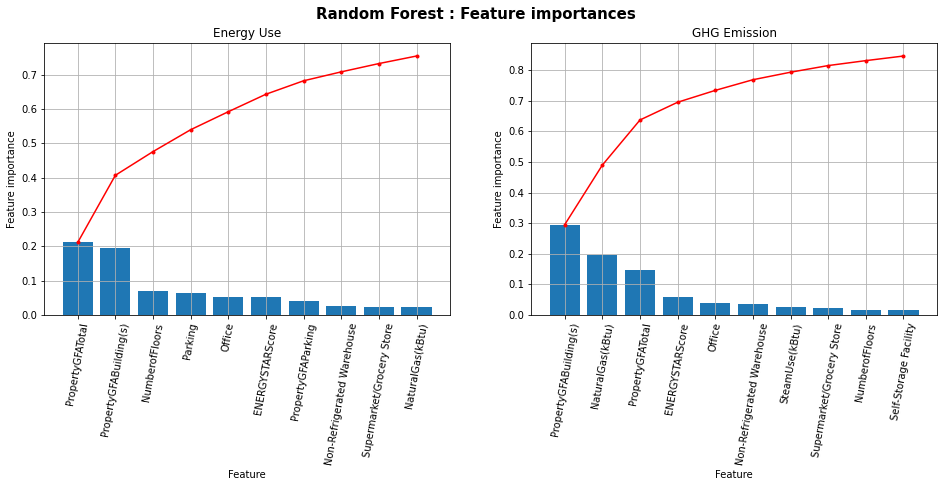

In [89]:
importance_rf=pd.DataFrame.from_dict({
    'name': df_train.columns.tolist(),
    'imp_energy': rf_energy_best.feature_importances_,
    'imp_GHG': rf_GHG_best.feature_importances_
})
importance_energy = importance_rf.sort_values(by=['imp_energy'], ascending=False)
cumul_energy = np.cumsum(importance_energy['imp_energy'].head(10))

importance_GHG = importance_rf.sort_values(by=['imp_GHG'], ascending=False)
cumul_GHG = np.cumsum(importance_GHG['imp_GHG'].head(10))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.bar(importance_energy['name'].head(10), importance_energy['imp_energy'].head(10))
ax1.plot(importance_energy['name'].head(10), cumul_energy, marker='.', c='r')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Feature importance')
ax1.set_title('Energy Use')
ax1.set_xticklabels(labels=importance_energy['name'].head(10), rotation=80)
ax1.grid()

ax2.bar(importance_GHG['name'].head(10), importance_GHG['imp_GHG'].head(10))
ax2.plot(importance_GHG['name'].head(10), cumul_GHG, marker='.', c='r')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Feature importance')
ax2.set_title('GHG Emission')
ax2.set_xticklabels(labels=importance_GHG['name'].head(10), rotation=80)
ax2.grid()

fig.suptitle('Random Forest : Feature importances', fontsize=15, fontweight='bold')
plt.show()

In [55]:
perf_rf = [
    r2_rf_energy,
    rmse_rf_energy,
    r2_rf_GHG,
    rmse_rf_GHG,
    time_energy_rf,
    time_GHG_rf
]

#### Random forests perform even better than the kernel SVR

# XGBoost
#### About 1.5 minutes using 4 cores

In [56]:
#!pip install xgboost

In [57]:
from xgboost import XGBRegressor

max_depth_range_xgb = [5, 10, 15, 30, 50]
colsample_bytree_range = [.5, .66, .75, 1]
learning_rate_range = [.01, .05, .1, .2, .3, .5]

model = XGBRegressor(n_estimators=100, random_state=0)
par_grid={
    'max_depth':max_depth_range_xgb,
    'colsample_bytree':colsample_bytree_range,
    'learning_rate':learning_rate_range
}

xgb_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)

xgb_energy.fit(df_train.values, y_energy_train.ravel())

print('Best hyperparams', xgb_energy.best_params_)
print('Best R2', xgb_energy.best_score_)
print('Best estimator : ', xgb_energy.best_estimator_, '\n')

start_time_energy_xgb = timeit.default_timer()

xgb_energy_best = xgb_energy.best_estimator_
xgb_energy_best.fit(df_train.values, y_energy_train.ravel())
predict_energy_xgb = xgb_energy_best.predict(df_test.values)

r2_xgb_energy = r2_score(y_energy_test, predict_energy_xgb)
rmse_xgb_energy = np.sqrt(mean_squared_error(y_energy_test, predict_energy_xgb))

time_energy_xgb = timeit.default_timer() - start_time_energy_xgb

print('R2 with best estimator (XGBoost energy) : ', r2_score(y_energy_test, predict_energy_xgb))
print('RMSE with best estimator (XGBoost energy) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_xgb)))
print('Run time (XGBoost energy) : ', time_energy_xgb)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   25.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  1.5min finished


Best hyperparams {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}
Best R2 0.7654891835874393
Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

R2 with best estimator (XGBoost energy) :  0.8204601609628872
RMSE with best estimator (XGBoost energy) :  0.41326610171843503
Run time (XGBoost energy) :  0.11479359999975713


In [58]:
#GHG

model = XGBRegressor(n_estimators=100, random_state=0)

xgb_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)
xgb_GHG.fit(df_train.values, y_GHG_train.ravel())

print('Best hyperparams', xgb_GHG.best_params_)
print('Best R2', xgb_GHG.best_score_)
print('Best estimator : ', xgb_GHG.best_estimator_, '\n')

start_time_GHG_xgb = timeit.default_timer()

xgb_GHG_best = xgb_GHG.best_estimator_
xgb_GHG_best.fit(df_train.values, y_GHG_train.ravel())
predict_GHG_xgb = xgb_GHG_best.predict(df_test.values)

r2_xgb_GHG = r2_score(y_GHG_test, predict_GHG_xgb)
rmse_xgb_GHG = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_xgb))

time_GHG_xgb = timeit.default_timer() - start_time_GHG_xgb

print('R2 with best estimator (XGBoost GHG) : ', r2_score(y_GHG_test, predict_GHG_xgb))
print('RMSE with best estimator (XGBoost GHG) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_xgb)))
print('Run time (XGBoost GHG) : ', time_GHG_xgb)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  1.5min finished


Best hyperparams {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}
Best R2 0.763412464134588
Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

R2 with best estimator (XGBoost GHG) :  0.7718901562810094
RMSE with best estimator (XGBoost GHG) :  0.4969939396044679
Run time (XGBoost GHG) :  0.1112332000002425


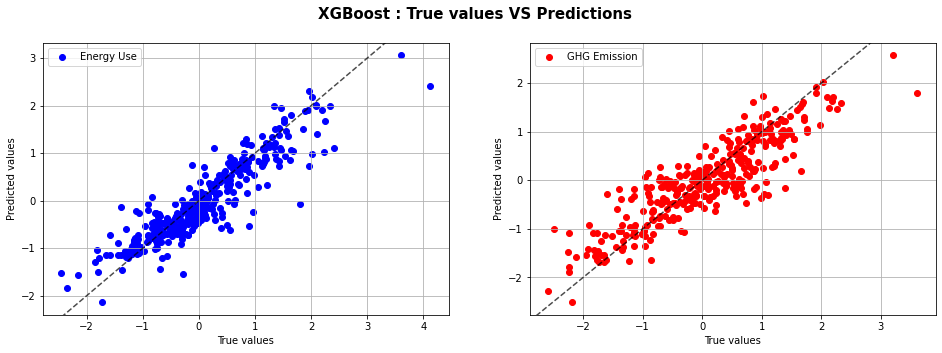

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
 
ax1.scatter(y_energy_test, predict_energy_xgb, c='b', label='Energy Use')
ax1.set_xlabel('True values')
ax1.set_ylabel('Predicted values')

xpoints = ypoints = ax1.get_xlim()
ax1.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax1.legend()
ax1.grid()

ax2.scatter(y_GHG_test, predict_GHG_xgb, c='r', label='GHG Emission')
ax2.set_xlabel('True values')
ax2.set_ylabel('Predicted values')

xpoints = ypoints = ax2.get_xlim()
ax2.plot(xpoints, ypoints, 'k--', alpha=.7, scalex=False, scaley=False)

ax2.legend()
ax2.grid()

fig.suptitle('XGBoost : True values VS Predictions', fontsize=15, fontweight='bold')
plt.show()

In [60]:
estimator_range_xgb = [5, 10, 15, 25, 50, 75, 100, 150, 200]
r2_energy_xgb = []
rmse_energy_xgb = []
times = []

for i in estimator_range:
    start_time = timeit.default_timer()
    
    xgb_energy_best.set_params(n_estimators=i)
    xgb_energy_best.fit(df_train.values, y_energy_train.ravel())
    predict_xgb_energy = xgb_energy_best.predict(df_test.values)
    
    r2_energy_xgb.append(r2_score(y_energy_test, predict_xgb_energy))
    rmse_energy_xgb.append(np.sqrt(mean_squared_error(y_energy_test, predict_xgb_energy)))
    times.append(timeit.default_timer() - start_time)

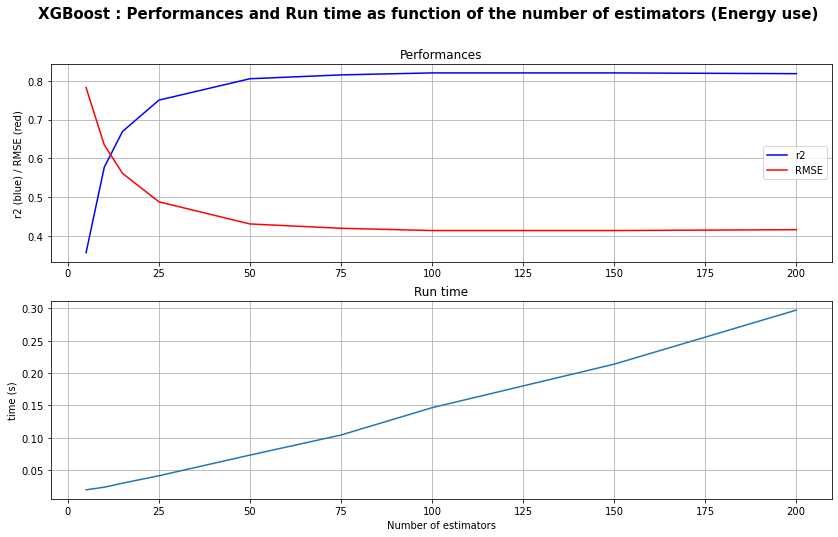

In [90]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,8))

ax1.plot(estimator_range, r2_energy_xgb, c='b', label='r2')
ax1.plot(estimator_range, rmse_energy_xgb, c='r', label='RMSE')
ax1.set_ylabel("r2 (blue) / RMSE (red)")
ax1.legend()
ax1.set_title('Performances')
ax1.grid()

ax2.plot(estimator_range, times)
ax2.set_ylabel('time (s)')
ax2.set_xlabel('Number of estimators')
ax2.set_title('Run time')
ax2.grid()

plt.suptitle('XGBoost : Performances and Run time as function of the number of estimators (Energy use)', fontsize=15, fontweight='bold')
plt.show()

<ipython-input-62-89d03b70418b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=importance_energy_xgb['name'].head(10), rotation=80)
<ipython-input-62-89d03b70418b>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=importance_GHG_xgb['name'].head(10), rotation=80)


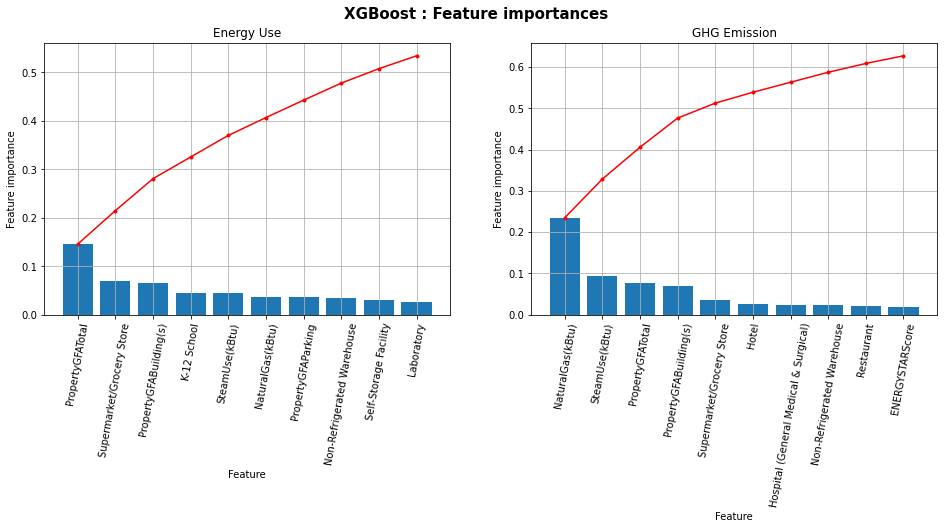

In [62]:
importance_xgb=pd.DataFrame.from_dict({
    'name': df_train.columns.tolist(),
    'imp_energy': xgb_energy_best.feature_importances_,
    'imp_GHG': xgb_GHG_best.feature_importances_
})
importance_energy_xgb = importance_xgb.sort_values(by=['imp_energy'], ascending=False)
cumul_energy_xgb = np.cumsum(importance_energy_xgb['imp_energy'].head(10))

importance_GHG_xgb = importance_xgb.sort_values(by=['imp_GHG'], ascending=False)
cumul_GHG_xgb = np.cumsum(importance_GHG_xgb['imp_GHG'].head(10))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.bar(importance_energy_xgb['name'].head(10), importance_energy_xgb['imp_energy'].head(10))
ax1.plot(importance_energy_xgb['name'].head(10), cumul_energy_xgb, marker='.', c='r')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Feature importance')
ax1.set_title('Energy Use')
ax1.set_xticklabels(labels=importance_energy_xgb['name'].head(10), rotation=80)
ax1.grid()

ax2.bar(importance_GHG_xgb['name'].head(10), importance_GHG_xgb['imp_GHG'].head(10))
ax2.plot(importance_GHG_xgb['name'].head(10), cumul_GHG_xgb, marker='.', c='r')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Feature importance')
ax2.set_title('GHG Emission')
ax2.set_xticklabels(labels=importance_GHG_xgb['name'].head(10), rotation=80)
ax2.grid()

fig.suptitle('XGBoost : Feature importances', fontsize=15, fontweight='bold')
plt.show()

In [63]:
perf_xgb = [
    r2_xgb_energy,
    rmse_xgb_energy,
    r2_xgb_GHG,
    rmse_xgb_GHG,
    time_energy_xgb,
    time_GHG_xgb
]

#### XGBoost is the algorithm, reaching r2 values >0.8

# Comparing algorithms

In [64]:
list_metrics = [
    'R2_energy',
    'RMSE_energy',
    'R2_GHG',
    'RMSE_GHG',
    'Run_Time_energy (s)',
    'Run_Time_GHG (s)'
]

df_performances = pd.DataFrame.from_dict({
    'Metric': list_metrics,
    'Ridge': perf_ridge,
    'Lasso': perf_lasso,
    'Elastic Net': perf_elastic,
    'SVR linear': perf_SVR_lin,
    'SVR RBF': perf_SVR_rbf,
    'Random Forest': perf_rf,
    'XGBoost': perf_xgb    
})
display(df_performances)

,Metric,Ridge,Lasso,Elastic Net,SVR linear,SVR RBF,Random Forest,XGBoost
0,R2_energy,0.238291,0.502458,0.390118,0.509520,0.682926,0.758344,0.820460
1,RMSE_energy,0.851224,0.687961,0.761679,0.683062,0.549199,0.479455,0.413266
2,R2_GHG,0.296479,0.465476,0.463665,0.491529,0.664595,0.733943,0.771890
3,RMSE_GHG,0.872806,0.760786,0.762074,0.742014,0.602648,0.536743,0.496994
4,Run_Time_energy (s),0.001890,0.006504,0.002836,0.024629,0.219860,0.242034,0.114794
5,Run_Time_GHG (s),0.001413,0.008433,0.009850,0.027374,0.232583,0.723315,0.111233


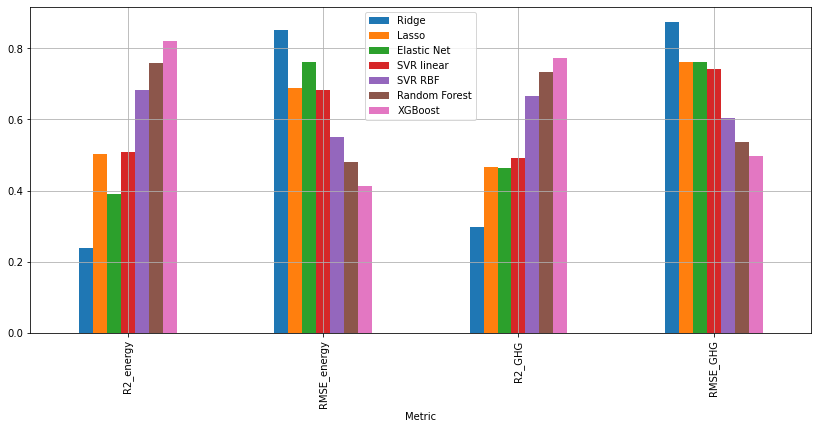

In [91]:
list_algos=df_performances.columns.tolist()[1:]
df_performances.iloc[:4,:].plot(x='Metric', y=list_algos, kind='bar', figsize=(14,6))
plt.grid()

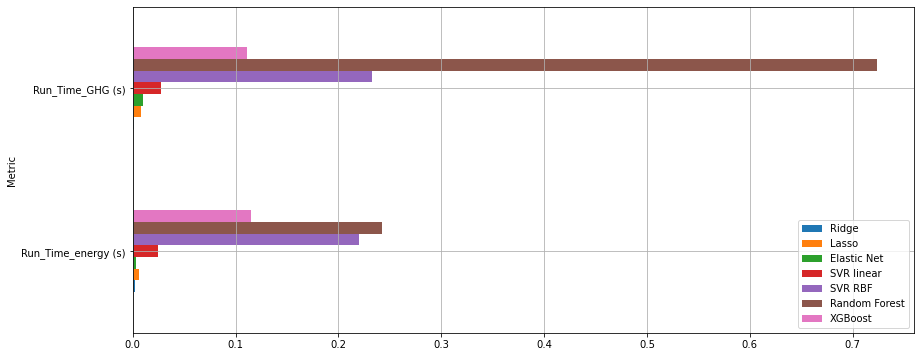

In [92]:
df_performances.iloc[-2:].plot(x='Metric', y=list_algos, kind='barh', figsize=(14,6))
plt.grid()

#### As can be expected, the non-linear algorithms take a longer time to run but provide better results

# Impact of EnergyStarScore

In [67]:
df = pd.read_csv(os.path.join("E:/OpenClassrooms/Projet4", 'building_energy_benchmark_2015-2016_engineered_v2.csv'))

In [68]:
df= df.loc[~df['ENERGYSTARScore'].isna(), :]

In [69]:
df.shape

(1154, 78)

In [70]:
# Define targets, categorical and continuous variables

target = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

categories=[
    'CouncilDistrictCode'
]
continuous = [i for i in df.columns.to_list() if i not in categories]
for i in target:
    continuous.remove(i)

X = df.loc[:, ~df.columns.isin(target)]

y_energy = df.loc[:, 'SiteEnergyUse(kBtu)'].values
y_GHG = df.loc[:, 'TotalGHGEmissions'].values

y = df.loc[:, ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

In [71]:
# split train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(923, 76)
(923, 2)
(231, 76)
(231, 2)


In [72]:
print(continuous)

['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(kBtu)', 'Other - Public Services', 'Residence Hall/Dormitory', 'Adult Education', 'Fast Food Restaurant', 'Data Center', 'Other - Services', 'Library', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Bar/Nightclub', 'Self-Storage Facility', 'Urgent Care/Clinic/Other Outpatient', 'Strip Mall', 'Non-Refrigerated Warehouse', 'Lifestyle Center', 'Police Station', 'Fire Station', 'Prison/Incarceration', 'Senior Care Community', 'Performing Arts', 'Refrigerated Warehouse', 'Pre-school/Daycare', 'Other - Utility', 'College/University', 'Supermarket/Grocery Store', 'Residential Care Facility', 'Parking', 'Financial Office', 'Convention Center', 'Restaurant', 'Food Sales', 'Office', 'K-12 School', 'Other/Specialty Hospital', 'Social/Meeting Hall', 'Vocational School', 'Automobile Dealership', 'Hospital (General 

In [73]:
# split categorical and continuous features, one with EnergyStarscore and one without

X_categ_train = X_train[categories].values
X_categ_test = X_test[categories].values

X_cont_train_with = X_train[continuous].values
X_cont_test_with = X_test[continuous].values

continuous.remove('ENERGYSTARScore')
X_cont_train_without = X_train[continuous].values
X_cont_test_without = X_test[continuous].values

#Split targets into 2 vectors (energy use and GHG emission)

y_energy_train = y_train['SiteEnergyUse(kBtu)']
y_GHG_train = y_train['TotalGHGEmissions']

y_energy_test = y_test['SiteEnergyUse(kBtu)']
y_GHG_test = y_test['TotalGHGEmissions']

print(X_cont_train_with.shape)
print(X_cont_train_without.shape)

(923, 75)
(923, 74)


# Transform X

### Continuous

In [74]:
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Train set
# WITH
imputer_cont_with = SimpleImputer(missing_values=np.nan, strategy='mean') #imputer continuous with
std_cont_with = StandardScaler()  #scaler continuous

imputer_cont_with.fit(X_cont_train_with)  #Training the imputer with 

X_cont_train_with = imputer_cont_with.transform(X_cont_train_with)  #Applying the imputer
X_cont_train_with_scaled = std_cont_with.fit_transform(X_cont_train_with) #Scaling

#WITHOUT

imputer_cont_without = SimpleImputer(missing_values=np.nan, strategy='mean') #imputer continuous  without
std_cont_without = StandardScaler()  #scaler continuous

imputer_cont_without.fit(X_cont_train_without)  #Training the imputer without

X_cont_train_without = imputer_cont_without.transform(X_cont_train_without)  #Applying the imputer
X_cont_train_without_scaled = std_cont_without.fit_transform(X_cont_train_without) #Scaling

   
    # Test set

X_cont_test_with = imputer_cont_with.transform(X_cont_test_with)
X_cont_test_with_scaled = std_cont_with.transform(X_cont_test_with)

X_cont_test_without = imputer_cont_without.transform(X_cont_test_without)
X_cont_test_without_scaled = std_cont_without.transform(X_cont_test_without)

### Categorical

In [75]:
# sur le train : traiter variables catégorielles
    # imputation données manquantes (most_frequent)
    # OneHotEncoding 
    # standard scale

    # appliquer toutes les étapes sur le test (imput, encoding, scale)


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='error')  #transforming categories into numeric values
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #Imputer categorical
std_cat = StandardScaler(with_mean=False) #scaler categorical

    #Train set

imputer_cat.fit(X_categ_train) #Training the imputer

X_categ_train = imputer_cat.transform(X_categ_train) #Applying the imputer
X_categ_train = ohe.fit_transform(X_categ_train) #Transformation
X_categ_train_scaled = std_cat.fit_transform(X_categ_train) #Scaling

    #Test set

X_categ_test = imputer_cat.transform(X_categ_test)
X_categ_test = ohe.transform(X_categ_test)
X_categ_test_scaled = std_cat.transform(X_categ_test)

In [76]:
# Agregating continuous and categorical train sets into new dataframes

df_X_cont_train_with = pd.DataFrame(X_cont_train_with_scaled)
df_X_cont_train_without = pd.DataFrame(X_cont_train_without_scaled)

df_X_categ_train = pd.DataFrame(X_categ_train_scaled.todense())

df_train_with = pd.concat([df_X_cont_train_with, df_X_categ_train], axis = 1)
df_train_without = pd.concat([df_X_cont_train_without, df_X_categ_train], axis = 1)


# Agregating continuous and categorical test sets


df_X_cont_test_with = pd.DataFrame(X_cont_test_with_scaled)
df_X_cont_test_without = pd.DataFrame(X_cont_test_without_scaled)
df_X_categ_test = pd.DataFrame(X_categ_test_scaled.todense())

df_test_with = pd.concat([df_X_cont_test_with, df_X_categ_test], axis = 1)
df_test_without = pd.concat([df_X_cont_test_without, df_X_categ_test], axis = 1)

#df_test.columns = names
#df_train.columns = names

In [77]:
print(df_test_with.shape)
print(df_test_without.shape)

(231, 82)
(231, 81)


# Transform y

In [78]:
y_energy_pt = PowerTransformer(method='yeo-johnson') #Transform for the energy use
y_GHG_pt = PowerTransformer(method='yeo-johnson')  #GHG emission

#print(y_GHG_train)

y_energy_train = y_energy_pt.fit_transform(y_energy_train.values.reshape(-1, 1)) #training and applying the transformation
y_GHG_train = y_GHG_pt.fit_transform(y_GHG_train.values.reshape(-1, 1))

#print(y_energy_train)




y_energy_test = y_energy_pt.transform(y_energy_test.values.reshape(-1, 1))
y_GHG_test = y_GHG_pt.transform(y_GHG_test.values.reshape(-1, 1))

#print(y_energy_test)

# Apply best model : XGBoost
### With EnergyStarScore

In [79]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
# Energy
max_depth_range_xgb = [5, 10, 15, 30, 50]
colsample_bytree_range = [.5, .66, .75, 1]
learning_rate_range = [.01, .05, .1, .2, .3, .5]

model = XGBRegressor(n_estimators=100, random_state=0)
par_grid={
    'max_depth':max_depth_range_xgb,
    'colsample_bytree':colsample_bytree_range,
    'learning_rate':learning_rate_range
}

xgb_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)

xgb_energy.fit(df_train_with.values, y_energy_train.ravel())

print('Best hyperparams', xgb_energy.best_params_)
print('Best R2', xgb_energy.best_score_)
print('Best estimator : ', xgb_energy.best_estimator_, '\n')

xgb_energy_best = xgb_energy.best_estimator_
xgb_energy_best.fit(df_train_with.values, y_energy_train.ravel())
predict_energy_xgb = xgb_energy_best.predict(df_test_with.values)

r2_xgb_energy_with = r2_score(y_energy_test, predict_energy_xgb)
rmse_xgb_energy_with = np.sqrt(mean_squared_error(y_energy_test, predict_energy_xgb))

print('R2 with best estimator (XGBoost energy with EnergyStarScore) : ', r2_score(y_energy_test, predict_energy_xgb))
print('RMSE with best estimator (XGBoost energy  with EnergyStarScore) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_xgb)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 550 tasks      | elapsed:   47.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   51.6s finished


Best hyperparams {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}
Best R2 0.8496259340523953
Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

R2 with best estimator (XGBoost energy with EnergyStarScore) :  0.8806245697215335
RMSE with best estimator (XGBoost energy  with EnergyStarScore) :  0.33310913472598


In [80]:
# GHG

model = XGBRegressor(n_estimators=100, random_state=0)

xgb_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)

xgb_GHG.fit(df_train_with.values, y_GHG_train.ravel())

print('Best hyperparams', xgb_GHG.best_params_)
print('Best R2', xgb_GHG.best_score_)
print('Best estimator : ', xgb_GHG.best_estimator_, '\n')

xgb_GHG_best = xgb_GHG.best_estimator_
xgb_GHG_best.fit(df_train_with.values, y_GHG_train.ravel())
predict_GHG_xgb = xgb_GHG_best.predict(df_test_with.values)

r2_xgb_GHG_with = r2_score(y_GHG_test, predict_GHG_xgb)
rmse_xgb_GHG_with = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_xgb))

print('R2 with best estimator (XGBoost GHG with EnergyStarScore) : ', r2_score(y_GHG_test, predict_GHG_xgb))
print('RMSE with best estimator (XGBoost GHG with EnergyStarScore) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_xgb)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.1s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   53.1s finished


Best hyperparams {'colsample_bytree': 0.66, 'learning_rate': 0.1, 'max_depth': 5}
Best R2 0.8000645862352409
Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.66,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

R2 with best estimator (XGBoost GHG with EnergyStarScore) :  0.8203765655459896
RMSE with best estimator (XGBoost GHG with EnergyStarScore) :  0.4236547228395601


In [81]:
perf_with = [
    r2_xgb_energy_with,
    rmse_xgb_energy_with,
    r2_xgb_GHG_with,
    rmse_xgb_GHG_with
]

### Without EnergyStarScore

In [82]:
# Energy
max_depth_range_xgb = [5, 10, 15, 30, 50]
colsample_bytree_range = [.5, .66, .75, 1]
learning_rate_range = [.01, .05, .1, .2, .3, .5]

model = XGBRegressor(n_estimators=100, random_state=0)
par_grid={
    'max_depth':max_depth_range_xgb,
    'colsample_bytree':colsample_bytree_range,
    'learning_rate':learning_rate_range
}

xgb_energy = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)

xgb_energy.fit(df_train_without.values, y_energy_train.ravel())

print('Best hyperparams', xgb_energy.best_params_)
print('Best R2', xgb_energy.best_score_)
print('Best estimator : ', xgb_energy.best_estimator_, '\n')

xgb_energy_best = xgb_energy.best_estimator_
xgb_energy_best.fit(df_train_without.values, y_energy_train.ravel())
predict_energy_xgb = xgb_energy_best.predict(df_test_without.values)

r2_xgb_energy_without = r2_score(y_energy_test, predict_energy_xgb)
rmse_xgb_energy_without = np.sqrt(mean_squared_error(y_energy_test, predict_energy_xgb))

print('R2 with best estimator (XGBoost energy without EnergyStarScore) : ', r2_score(y_energy_test, predict_energy_xgb))
print('RMSE with best estimator (XGBoost energy  without EnergyStarScore) : ', np.sqrt(mean_squared_error(y_energy_test, predict_energy_xgb)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 236 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 486 tasks      | elapsed:   41.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   51.9s finished


Best hyperparams {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}
Best R2 0.7709758560300614
Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

R2 with best estimator (XGBoost energy without EnergyStarScore) :  0.7675645245322061
RMSE with best estimator (XGBoost energy  without EnergyStarScore) :  0.46481514894796006


In [83]:
# GHG

model = XGBRegressor(n_estimators=100, random_state=0)

xgb_GHG = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='r2',
    n_jobs=4,
    verbose=1
)

xgb_GHG.fit(df_train_without.values, y_GHG_train.ravel())

print('Best hyperparams', xgb_GHG.best_params_)
print('Best R2', xgb_GHG.best_score_)
print('Best estimator : ', xgb_GHG.best_estimator_, '\n')

xgb_GHG_best = xgb_GHG.best_estimator_
xgb_GHG_best.fit(df_train_without.values, y_GHG_train.ravel())
predict_GHG_xgb = xgb_GHG_best.predict(df_test_without.values)

r2_xgb_GHG_without = r2_score(y_GHG_test, predict_GHG_xgb)
rmse_xgb_GHG_without = np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_xgb))

print('R2 with best estimator (XGBoost GHG without EnergyStarScore) : ', r2_score(y_GHG_test, predict_GHG_xgb))
print('RMSE with best estimator (XGBoost GHG without EnergyStarScore) : ', np.sqrt(mean_squared_error(y_GHG_test, predict_GHG_xgb)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   38.6s


Best hyperparams {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5}
Best R2 0.7518048527479427
Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

R2 with best estimator (XGBoost GHG without EnergyStarScore) :  0.7393955011597271
RMSE with best estimator (XGBoost GHG without EnergyStarScore) :  0.5102952297847484


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   55.7s finished


In [84]:
perf_without = [
    r2_xgb_energy_without,
    rmse_xgb_energy_without,
    r2_xgb_GHG_without,
    rmse_xgb_GHG_without
]

## Comparing with and without EnergyStarScore

In [85]:
list_metrics_ESS = [
    'R2_energy',
    'RMSE_energy',
    'R2_GHG',
    'RMSE_GHG'
]

df_performances_ESS = pd.DataFrame.from_dict({
    'Metric': list_metrics_ESS,
    'XGBoost_with_ESS': perf_with,
    'XGBoost_without_ESS': perf_without,
})
display(df_performances_ESS)

,Metric,XGBoost_with_ESS,XGBoost_without_ESS
0,R2_energy,0.880625,0.767565
1,RMSE_energy,0.333109,0.464815
2,R2_GHG,0.820377,0.739396
3,RMSE_GHG,0.423655,0.510295


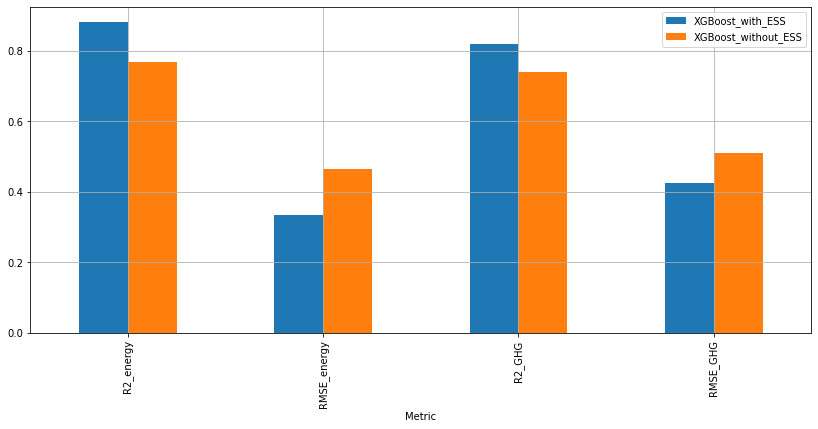

In [94]:
list_algos_ESS = df_performances_ESS.columns.tolist()[1:]
df_performances_ESS.plot(x='Metric', y=list_algos_ESS, kind='bar', figsize=(14,6))
plt.grid()

### The EnergyStarScore improves the performances by ~10%